In [573]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from bokeh.core.properties import value
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge
import bokeh
#bokeh.sampledata.download()
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import scikitplot as skplt

In [574]:
#create a bokeh output notebook
output_notebook()

Loading BokehJS ...

In [599]:
#Read the covid19 dataset
df= pd.read_csv(r'owid-covid-data.csv')

In [600]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [696]:
# Determine Total Number of Confirmed Cases worldwide
df.new_cases.sum()

2519826

In [602]:
# Determine Total Number of Confirmed Deaths
df.total_deaths.sum()

2735243

In [603]:
# Determine Total Number of Tests
df.total_tests.sum()

266400109.0

In [746]:
#Finding total number of Deaths in USA
df.loc[df['location'] == 'United States', 'new_deaths'].sum()

45063

In [680]:
#Creating a new dataframe grouped by each country
grouped=df.groupby('location')['new_deaths', 'new_cases', 'new_tests'].sum()

In [682]:
# Sort countries by number of Deaths
grouped1= grouped1.sort_values(['new_deaths'], ascending=[False])

In [638]:
# Sort countries by number of confirmed cases
grouped2=grouped.sort_values(['new_cases'], ascending=[False]);

In [639]:
# Sort countries by number of tests
grouped3=grouped.sort_values(['new_tests'], ascending=[False])

In [640]:
grouped1 = grouped1.reset_index('location')

In [641]:
grouped2 = grouped2.reset_index('location')

In [642]:
grouped3= grouped3.reset_index('location')

In [686]:
#Slicing top 15 countries from dataframe
grouped1=grouped1.iloc[:15]

In [687]:
#Slicing top 15 countries from dataframe
grouped2= grouped2.iloc[:15]


In [688]:
#Slicing top 15 countries from dataframe
grouped3= grouped3.iloc[:15]


In [689]:
grouped1

,new_deaths,new_cases,new_tests
location,,,
United States,45063,825041,4152789.0
Italy,24648,183957,1508927.0
Spain,21282,204178,0.0
France,20796,117324,14987.0
United Kingdom,17337,129044,411161.0
Belgium,5998,40956,171275.0
Iran,5297,84802,120777.0
Germany,4879,145694,0.0
China,4636,83864,0.0


In [690]:
grouped2= grouped2[['location', 'new_cases']]

In [654]:
grouped2

,location,new_cases
0,United States,825041
1,Spain,204178
2,Italy,183957
3,Germany,145694
4,United Kingdom,129044
5,France,117324
6,Turkey,95591
7,Iran,84802
8,China,83864
9,Russia,52763


In [655]:
grouped3= grouped3[['location', 'new_tests']]

In [656]:
grouped3

,location,new_tests
0,United States,4152789.0
1,Russia,2117849.0
2,Italy,1508927.0
3,Turkey,740926.0
4,South Korea,577554.0
5,Canada,506578.0
6,Australia,451554.0
7,United Kingdom,411161.0
8,India,365654.0
9,Israel,261215.0


In [657]:
#convert datetimes to strings
grouped1['location'] = grouped1['location'].apply(str)
#convert dataframe to dict
data = grouped.1to_dict(orient='list')
dates = grouped1['location'].tolist()

In [745]:
# Create a Bokeh bar chart for countries with most number of deaths
source = ColumnDataSource(data=data)

#get max possible value of plotted columns with some offset
p = figure(x_range=dates, y_range=(0, grouped1['new_deaths'].values.max() + 1000),
           plot_height=250, title="Top 15 Countries with highest number of deaths",
           toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('location', 0, range=p.x_range), top='new_deaths', width=0.4, source=source,
       color="SteelBlue")

p.add_tools(HoverTool(tooltips=[("total_deaths", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
show(p)


In [660]:
#convert datetimes to strings
grouped2['location'] = grouped2['location'].apply(str)
#convert dataframe to dict
data2 = grouped2.to_dict(orient='list')
dates2 = grouped2['location'].tolist()

In [693]:
# Create a Bokeh bar chart for countries with most number of cases
source = ColumnDataSource(data=data2)

#get max possible value of plotted columns with some offset
l = figure(x_range=dates2, y_range=(0, grouped2['new_cases'].values.max() + 100000), 
           plot_height=300, title="Top 15 Countries with highest number of cases",
           toolbar_location=None, tools="", plot_width= 1200)

l.vbar(x=dodge('location', 0, range=p.x_range), top='new_cases', width=0.4, source=source,
       color="SteelBlue")

l.add_tools(HoverTool(tooltips=[("total_cases", "$y{int}")]))
l.x_range.range_padding = 0.1
l.xgrid.grid_line_color = None
show(l)


In [662]:
#convert datetimes to strings
grouped3['location'] = grouped3['location'].apply(str)
#convert dataframe to dict
data3 = grouped3.to_dict(orient='list')
dates3 = grouped3['location'].tolist()

In [694]:
# Create a Bokeh bar chart for countries with most number of tests conducted
source = ColumnDataSource(data=data3)

output_file("dodged_bars_test.html")
#get max possible value of plotted columns with some offset
p = figure(x_range=dates3, y_range=(0, grouped3['new_tests'].values.max() + 100000), 
           plot_height=250, title="Top 15 countries with highest number of Covid19 Tests",
           toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('location', 0, range=p.x_range), top='new_tests', width=0.4, source=source,
       color="SteelBlue")


p.add_tools(HoverTool(tooltips=[("total_tests", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
show(p)


In [516]:
# Plotting total number of cases and total deaths worldwide
pivoted = pd.pivot_table(df, index=['date'],values=['new_cases', 'new_deaths'],
                    aggfunc= {'new_cases':['sum'],
                               'new_deaths':['sum']
                                })

In [517]:
pivoted.head()

,new_cases,new_deaths
,sum,sum
date,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


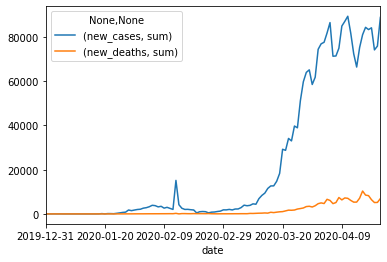

In [518]:
pivoted.plot()

In [747]:
# Creating horizontal Bar Chart to find out total cases in all the countries 
pivoted1 = pd.pivot_table(df, index=['location'],values=['new_cases', 'new_deaths'],
                    aggfunc= {'new_cases':['sum'],
                               'new_deaths':['sum']
                                })

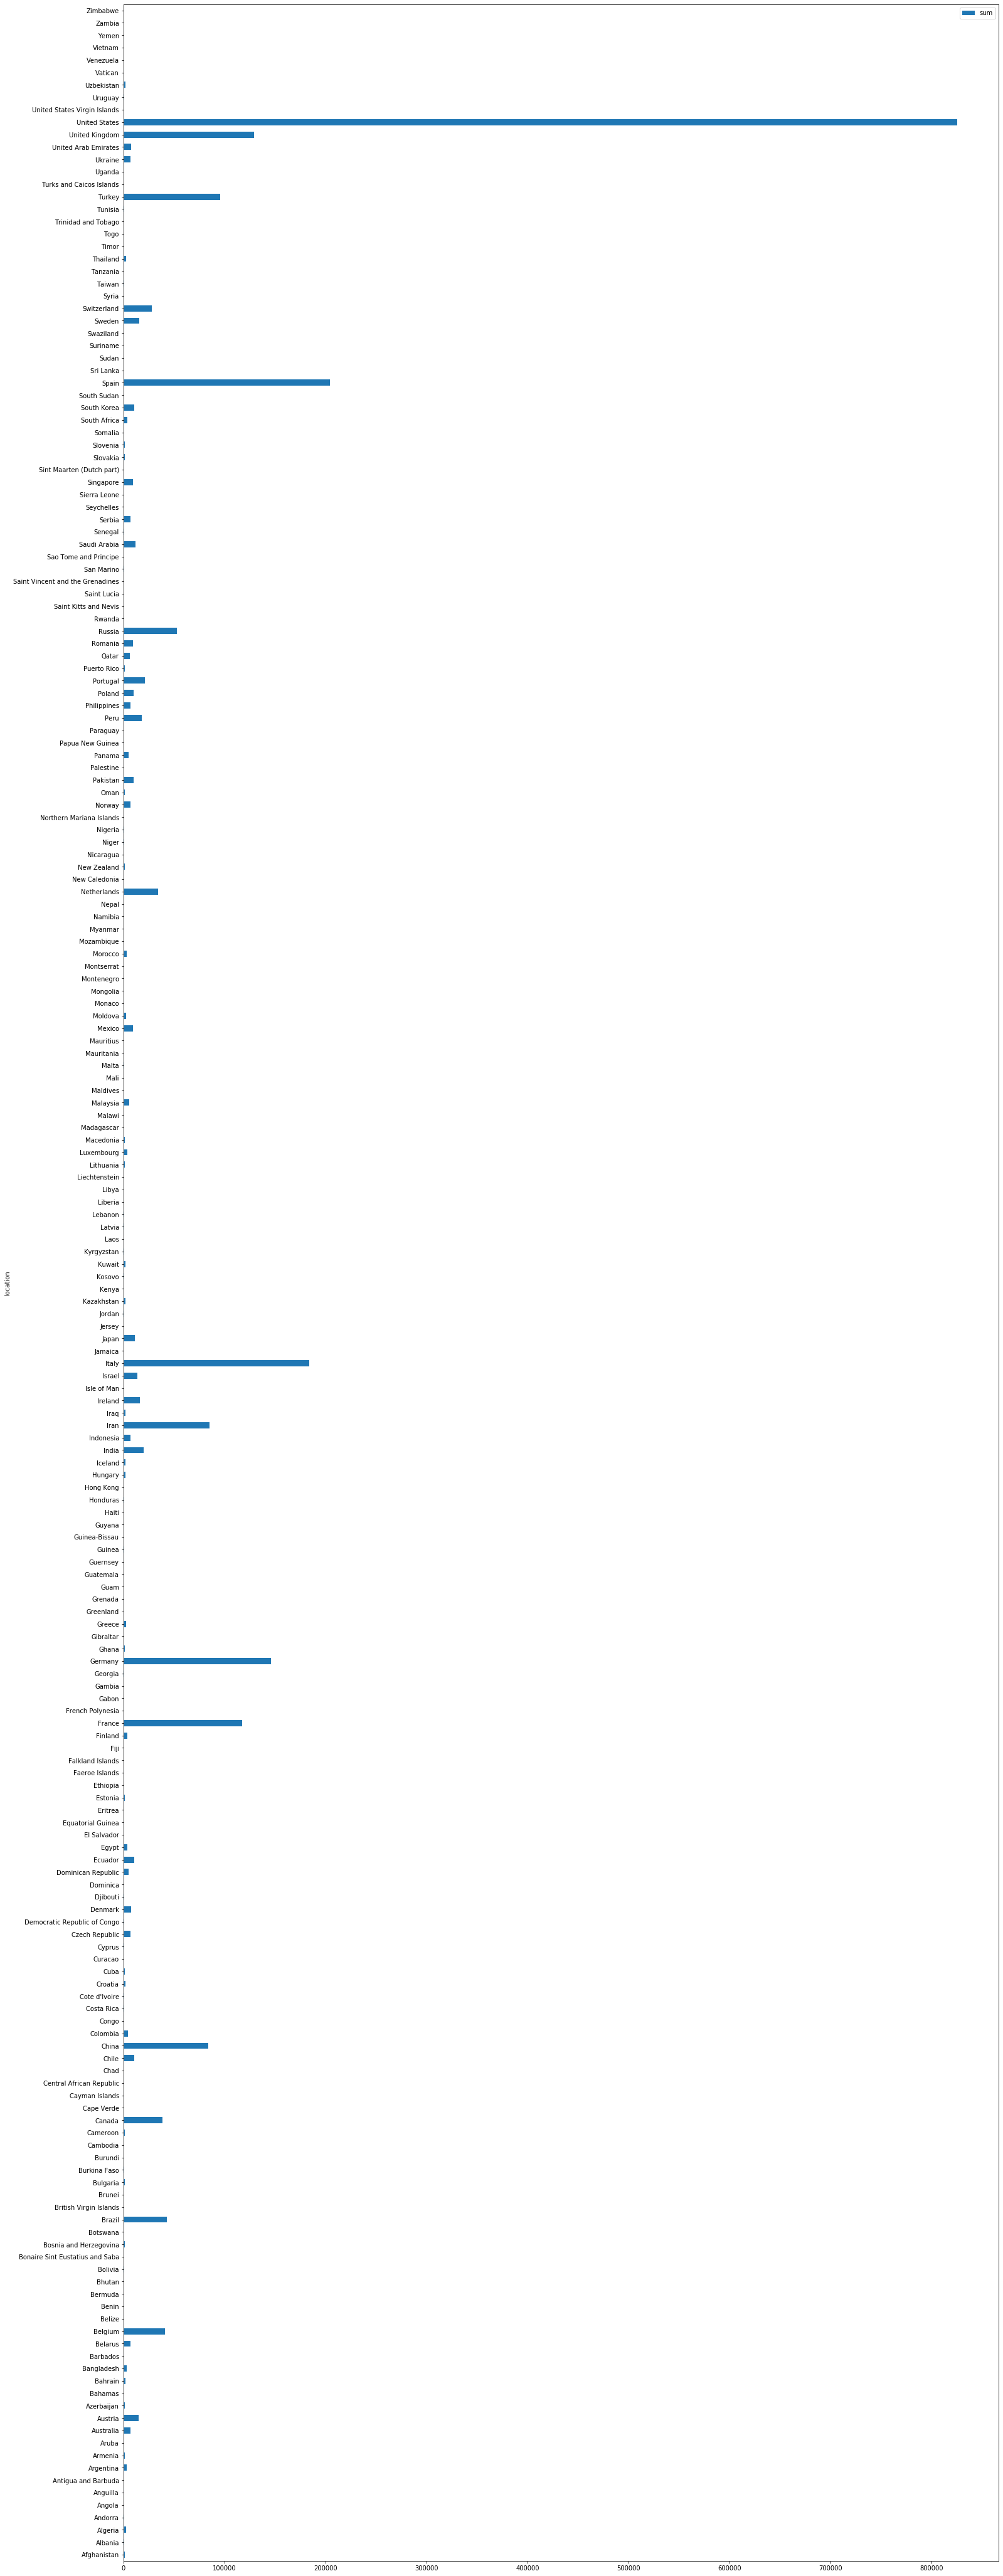

In [748]:
pivoted1['new_cases'].plot(kind='barh', figsize=(25,75))

In [540]:
#select the columns of total_deaths, total_cases, date, location
df_new=df[['date', 'location', 'new_deaths', 'new_cases']]

In [541]:
# select the rows of top 5 countries 
options = ['United States', 'United Kingdom', 'Italy', 'Spain', 'France', 'China'] 
df_new= df_new[df_new['location'].isin(options)]
  

In [664]:
# Date is an object type
df_new.date.dtype

dtype('O')

In [670]:
#convert date to datetime object
df_new['date'] = pd.to_datetime(df_new['date'], errors='coerce')

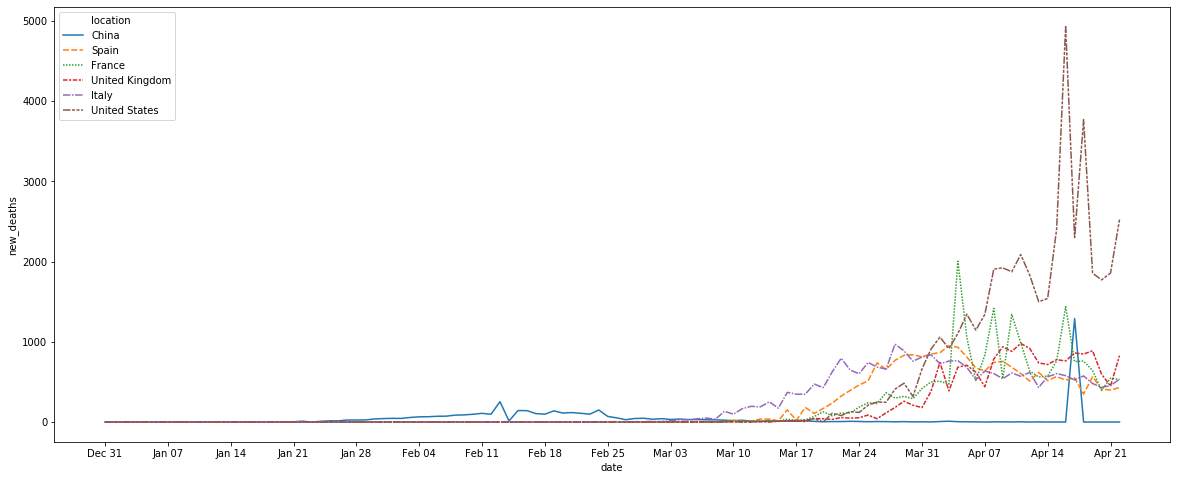

In [671]:
# Create a timeline line chart about number of deaths in top 5 countries
import seaborn as sns
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_new, x='date', y='new_deaths', hue='location', style='location', ax=ax)
# set the frequency for labelling the xaxis

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [667]:
#select the top 5 countries in terms of number of cases
options2 = ['United States', 'Germany', 'Italy', 'Spain', 'China', 'United Kingdom'] 
df_new2= df_new[df_new['location'].isin(options2)]

In [668]:
#convert date to datetime object
df_new2['date'] = pd.to_datetime(df_new2['date'], errors='coerce')

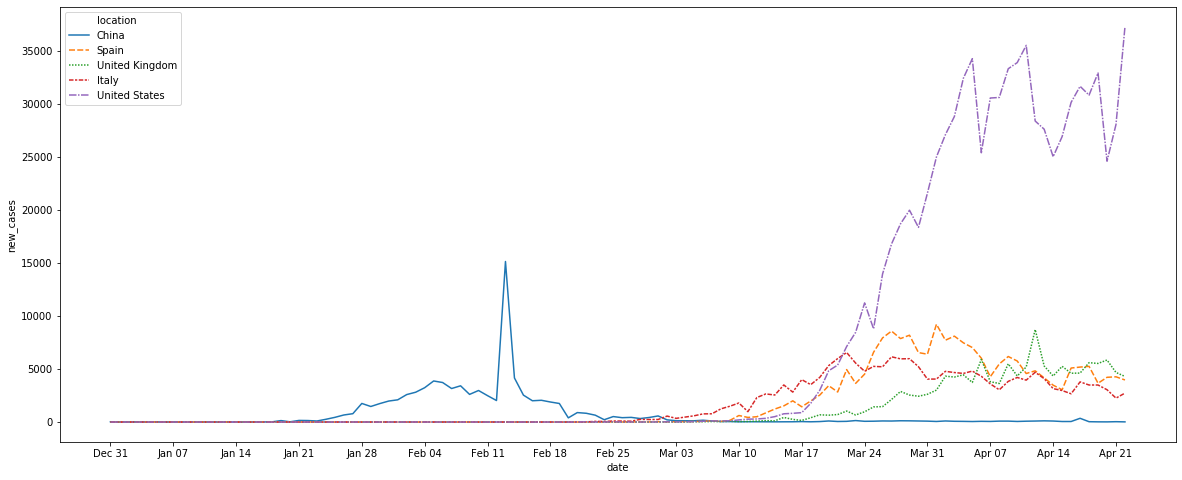

In [669]:
# Create a timeline line chart about number of cases in top 5 countries
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_new2, x='date', y='new_cases', hue='location', style='location', ax=ax)
# set the frequency for labelling the xaxis

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [719]:
# Load the New York Times Dataset on all the states in USA 
df_us= pd.read_csv(r'us-states.csv')

In [720]:
df_us.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [736]:
# grouping the data by states and finding the total cases and total deaths
grouped_states=df_us.groupby('state')['cases', 'deaths'].max()

In [737]:
grouped_states

,cases,deaths
state,,
Alabama,5327,186
Alaska,327,7
American Samoa,0,0
Arizona,5251,213
Arkansas,2262,43
California,35844,1316
Colorado,10447,484
Connecticut,20360,1423
Delaware,2931,82


In [738]:
# Sort the dataframe by number of cases
grouped_states= grouped_states.sort_values(['cases'], ascending=[False])

In [739]:
grouped_states= grouped_states.reset_index('state')
grouped_states=grouped_states.iloc[:15]

In [740]:
#View the dataframe
grouped_states

,state,cases,deaths
0,New York,251720,14828
1,New Jersey,92387,4753
2,Massachusetts,41199,1961
3,California,35844,1316
4,Pennsylvania,35384,1620
5,Illinois,33059,1479
6,Michigan,32935,2698
7,Florida,27861,866
8,Louisiana,24854,1405
9,Texas,20949,552


In [741]:
#convert datetimes to strings
grouped_states['state'] = grouped_states['state'].apply(str)
#convert dataframe to dict
data_states = grouped_states.to_dict(orient='list')
dates_states = grouped_states['state'].tolist()

In [744]:
# Create a Bar Chart for the top 15 states in USA with most number of confirmed Covid19 Cases
source = ColumnDataSource(data=data_states)

#get max possible value of plotted columns with some offset
p = figure(x_range=dates_states, y_range=(0, grouped_states['cases'].values.max() + 10000),
           plot_height=250, title="Top 15 US States with most number of confirmed cases",
           toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('state', 0, range=p.x_range), top='cases', width=0.4, source=source,
       color="SteelBlue")

p.add_tools(HoverTool(tooltips=[("total_cases", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
show(p)
